
**Breast Cancer prediction machine learning tutorial using logistic regression**

**Objective **
Predict breast cancer based on a set of cytology features (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nuceloli, mitosis).


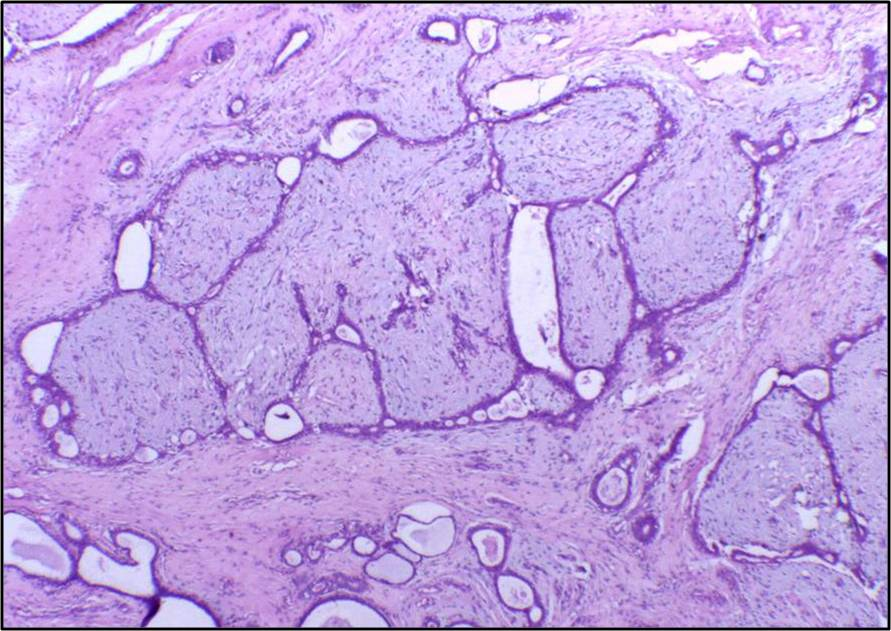


In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [58]:
# Read breast cancer csv file to pandas data frame data
data = pd.read_csv('../input/wisconsin_breast_cancer.csv')

In [4]:
# Display the first 5 rows of the csv file
data.head()

In [5]:
data.shape # It is always a good idea to understand your data

In [6]:
# There are 699 rows and 11 columns in this CSV file

In [7]:
data.isnull().sum() # Find out how many cells have missing values
# Looks like the field nuclei has 16 missing values

In [8]:
data=data.dropna(how='any') # Dropping any rows that has missing values

previously we had 699 rows. The above code deleted 16 rows with missing values and now we have 683 rows

In [9]:
#creating feature data set
# Here we are going to select feature fileds and assign it to a pandas data frame x. We do not need Id. So it was dropped
x=data[['thickness','size','shape','adhesion','single','nuclei','chromatin','nucleoli','mitosis']]

In [10]:
x.head() # printing the first 5 rows to see whether we got all the features

In [11]:

# Now we are going to extract the 'class' field from 'data' and store it in variable y
# This is the variable that we want to predict 0= no cancer 1 = cancer 
y=data['class']
y.head()

**Getting ready to do classification**
Import cross validation from sklearn for test trian split. Then import logistic regression from sklearn.

The goal is to spilit our data into two. A traning data set and a testing set. We will use the training set to train our logistic regression model. After that, we will use this model to predict cancer occurance from the features in the testing set. Since we already know the occurance of cancer in the testing set we can comapre it with the predicted vaules to benchmark our model.

In [12]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:

# train logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

In [14]:
y_pred_class=logreg.predict(x_test) # make predictions based on x_test and store it to y_pred_class

In [15]:
# Now let us see how our model is performing. 
# We will start with accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))


Not bad at all. 92.9% of the time our model was able to identify breast cancer based on the training data. 
Now let us see how our "intelligent" model compare to a dumb model which predicts "o" or "not cancer" all the time  because it the most prevelent class.

In [16]:
y_test.value_counts() # as you can see "0" is more prevalent

In [17]:
# Now let us see the percentage of "o" in y_test. This will be the accuracy of a dumb model that predicts 0 
# all the time
1-y_test.mean()

Looks like we did better than the dumb model!

Now let us create a confusion matrix to identify sensitivity specificity & all the other good statistical stuff

In [18]:

print (metrics.confusion_matrix(y_test, y_pred_class))

In [19]:
#  let us see what this means
#
#                Predicted 0    Predicted 1    Total
#                                
#Actual  0        103              4            107
#Actual  1          8             56             64   

#Total            111             60

In [20]:
confusion =metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [21]:
# Let us see the sensitivity of our logistic regression model
print (TP / float(TP+FN))

In [22]:
# Our model's sensitivity is 87.5%

In [23]:

# Let us calculate specificity
print (TN / float(TN+FP))

In [24]:
# Looks like our model has pretty good specificity 96.2%

In [25]:
# Calculate false postive rate - predicting cancer when pt does not have cancer
print (FP/ float(TN+FP))

In [26]:
# pretty awesome 3.7%

In [27]:

# precison - when it is predicting cancer how precise is it 
# positive predictive value 
print (TP / float(TP+FP))

In [28]:
# Negative predictive value
print (TN / float(TN+ FN))

In [29]:

# Now let us say that you want to figure out the probaility of cancer from a set of features
# we can use the predict_proba function
# let us first see the predicted answers
logreg.predict(x_test)[0:10] # predicting cancer  based on the data from first 10 rows of x

In [30]:
# Now let us predict the probaility of each prediction
logreg.predict_proba(x_test)[0:10, :]

In [31]:
# The first colun is the probability of it being benign. Second column is the probablity of it being cancerous

Now let us find out the area under the curve.
"roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve"

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 
import random 
%matplotlib inline 
# calculates the probability of predicting "1" (cancer) and store the out put in probab_cancer
proba_cancer=logreg.predict_proba(x_test)[:,1]

In [33]:
# we need the actual values in the cancer column and the predicted probabilities of postive value "1"
roc_auc_score(y_test, proba_cancer)

In [34]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, proba_cancer)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [35]:

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()